<a href="https://colab.research.google.com/github/AnkitPrasad-Java/Face-Mask-Detection-Using-CNN/blob/main/Face_Mask_Detection_Using_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install kaggle

In [ ]:
#configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Importing the Dataset

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("omkargurav/face-mask-dataset")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/face-mask-dataset


In [ ]:
# to list your directory
!ls

kaggle.json  sample_data


**Importing the dependencies**

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2 # Image processing
from google.colab.patches import cv2_imshow #
from PIL import Image # PIL is used for image processing
from sklearn.model_selection import train_test_split #It is used to split our data

In [ ]:
with_mask_files=os.listdir('/kaggle/input/face-mask-dataset/data/with_mask')
print(with_mask_files[0:5]) # First Five Columns
print(with_mask_files[-5:]) # Last Five Columns

['with_mask_3326.jpg', 'with_mask_3139.jpg', 'with_mask_696.jpg', 'with_mask_2867.jpg', 'with_mask_39.jpg']
['with_mask_502.jpg', 'with_mask_110.jpg', 'with_mask_3205.jpg', 'with_mask_1863.jpg', 'with_mask_2020.jpg']


In [ ]:
without_mask_files=os.listdir('/kaggle/input/face-mask-dataset/data/without_mask')
print(without_mask_files[0:5]) # First Five Columns
print(without_mask_files[-5:]) # Last Five Columns

['without_mask_3248.jpg', 'without_mask_2803.jpg', 'without_mask_650.jpg', 'without_mask_2060.jpg', 'without_mask_559.jpg']
['without_mask_3215.jpg', 'without_mask_2934.jpg', 'without_mask_2572.jpg', 'without_mask_1906.jpg', 'without_mask_2551.jpg']


In [ ]:
print('Number of with masks images', len(with_mask_files))
print('Number of without masks images', len(without_mask_files))

Number of with masks images 3725
Number of without masks images 3828


We will create a label for 'with mask' and 'without mask' images.

**Note- It is easier to create labels in our case because we have segregated data but it is true that we will not have segregated data everytime. At those times you will have to read individual file name and then label it accordingly.**

**Creating Labels for the two class of images**

With Mask --> 1

Without Mask --> 0

In [ ]:
# create the labels

with_mask_labels =[1]*3725
without_mask_labels=[0]*3828

In [ ]:
print(with_mask_labels[0:5])
print(without_mask_labels[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [ ]:
  print(len(with_mask_labels))
  print(len(without_mask_labels))

3725
3828


In [ ]:
labels= with_mask_labels + without_mask_labels

print(len(labels))
print(labels[0:5])
print(labels[-5:])

7553
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


**Displaying the images**

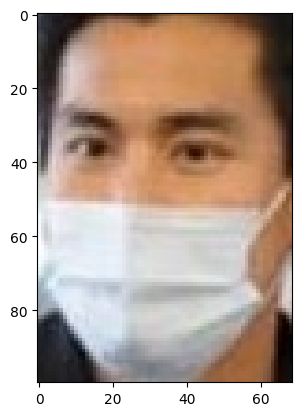

In [ ]:
# displaying with_mask image
img=mpimg.imread('/kaggle/input/face-mask-dataset/data/with_mask/with_mask_696.jpg')
imgplot=plt.imshow(img)
plt.show()

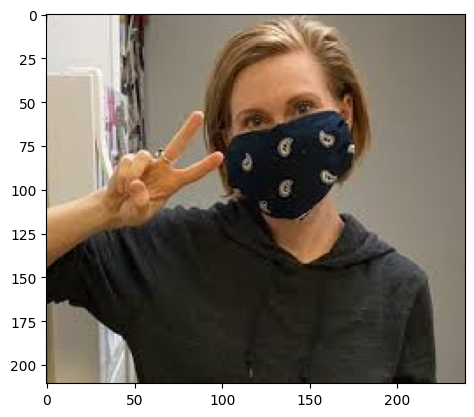

In [ ]:
# displaying with_mask image
img=mpimg.imread('/kaggle/input/face-mask-dataset/data/with_mask/with_mask_2867.jpg')
imgplot=plt.imshow(img)
plt.show()

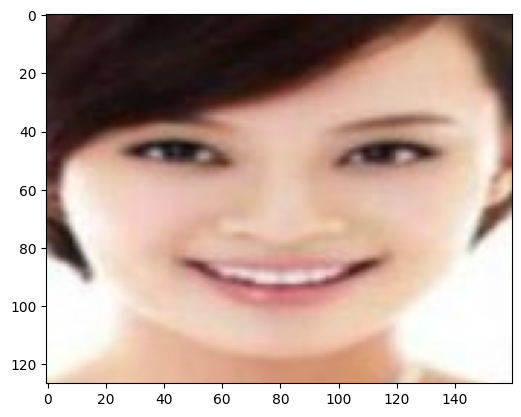

In [ ]:
# displaying without_mask image
img=mpimg.imread('/kaggle/input/face-mask-dataset/data/without_mask/without_mask_3215.jpg')
imgplot=plt.imshow(img)
plt.show()

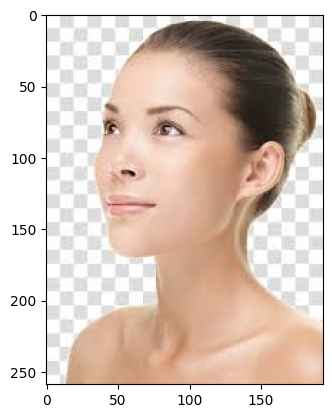

In [ ]:
# displaying without_mask image
img=mpimg.imread('/kaggle/input/face-mask-dataset/data/without_mask/without_mask_2925.jpg')
imgplot=plt.imshow(img)
plt.show()

**Image Processing**

1) Resize the images.

2) Convert the images to numpy arrays.

In [ ]:
# convert masked images to numpy arrays

with_mask_path = '/kaggle/input/face-mask-dataset/data/with_mask/' # we need to put a forward slash at the end because we need to

data=[]

for img_file in with_mask_files:

  image=Image.open(with_mask_path + img_file) # I want to read each image with masks(Image is from PIL library and img_file will read the first image in with_mask file)
  image=image.resize((128,128)) # resizing the image
  image=image.convert('RGB') # There are some images which are black and white
  image=np.array(image)
  data.append(image)


# convert without mask images to numpy arrays

without_mask_path = '/kaggle/input/face-mask-dataset/data/without_mask/' # we need to put a forward slash at the end because we need to

for img_file in without_mask_files:

  image=Image.open(without_mask_path + img_file) # I want to read each image with masks(Image is from PIL library and img_file will read the first image in with_mask file)
  image=image.resize((128,128)) # resizing the image
  image=image.convert('RGB') # There are some images which are black and white
  image=np.array(image)
  data.append(image)


/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [ ]:
type(data)

list

In [ ]:
len(data)

7553

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [254, 254, 254],
        [253, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [252, 253, 254],
        [246, 139, 136],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [212, 175, 154],
        [218, 187, 172],
        [250, 247, 245]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [212, 175, 154],
        [220, 191, 175],
        [252, 250, 248]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [211, 174, 155],
        [219, 194, 180],
        [252, 251, 250]]], dtype=uint8)
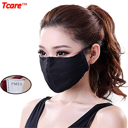

In [ ]:
data[0]

In [ ]:
type(data[0])

numpy.ndarray

In [ ]:
data[0].shape

(128, 128, 3)

In [ ]:
# converting image list and label list to numpy array

X=np.array(data)
Y=np.array(labels)

In [ ]:
type(X)

numpy.ndarray

In [ ]:
type(Y)

numpy.ndarray

In [ ]:
print(X.shape)
print(Y.shape)

(7553, 128, 128, 3)
(7553,)


In [ ]:
print(Y)

[1 1 1 ... 0 0 0]


**Train and Test split**

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2) # @20% of data is testing data

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3)


In [ ]:
# scaling the data

X_train_scaled= X_train/255

X_test_scaled= X_test/255

# we did this to change the data array values between 0 and 1.

array([[[48, 48, 60],
        [43, 43, 54],
        [36, 36, 46],
        ...,
        [92, 77, 70],
        [93, 79, 72],
        [94, 81, 73]],

       [[48, 48, 60],
        [43, 43, 55],
        [36, 36, 46],
        ...,
        [92, 77, 70],
        [93, 79, 71],
        [94, 81, 73]],

       [[45, 45, 57],
        [38, 38, 49],
        [31, 31, 41],
        ...,
        [94, 79, 74],
        [93, 78, 72],
        [93, 78, 71]],

       ...,

       [[15, 16, 21],
        [15, 16, 21],
        [16, 17, 22],
        ...,
        [16, 17, 21],
        [17, 18, 22],
        [17, 18, 22]],

       [[14, 15, 20],
        [14, 15, 20],
        [15, 16, 21],
        ...,
        [17, 18, 22],
        [17, 18, 22],
        [17, 18, 22]],

       [[14, 15, 20],
        [14, 15, 20],
        [15, 16, 21],
        ...,
        [18, 19, 23],
        [19, 20, 24],
        [19, 20, 24]]], dtype=uint8)
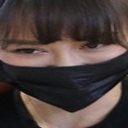

In [ ]:
X_train[0]

In [ ]:
X_train_scaled[0]

array([[[0.18823529, 0.18823529, 0.23529412],
        [0.16862745, 0.16862745, 0.21176471],
        [0.14117647, 0.14117647, 0.18039216],
        ...,
        [0.36078431, 0.30196078, 0.2745098 ],
        [0.36470588, 0.30980392, 0.28235294],
        [0.36862745, 0.31764706, 0.28627451]],

       [[0.18823529, 0.18823529, 0.23529412],
        [0.16862745, 0.16862745, 0.21568627],
        [0.14117647, 0.14117647, 0.18039216],
        ...,
        [0.36078431, 0.30196078, 0.2745098 ],
        [0.36470588, 0.30980392, 0.27843137],
        [0.36862745, 0.31764706, 0.28627451]],

       [[0.17647059, 0.17647059, 0.22352941],
        [0.14901961, 0.14901961, 0.19215686],
        [0.12156863, 0.12156863, 0.16078431],
        ...,
        [0.36862745, 0.30980392, 0.29019608],
        [0.36470588, 0.30588235, 0.28235294],
        [0.36470588, 0.30588235, 0.27843137]],

       ...,

       [[0.05882353, 0.0627451 , 0.08235294],
        [0.05882353, 0.0627451 , 0.08235294],
        [0.0627451 , 0

**Buliding a Convolutional Neural Network(CNN)**

In [ ]:
import tensorflow as tf
from tensorflow import keras

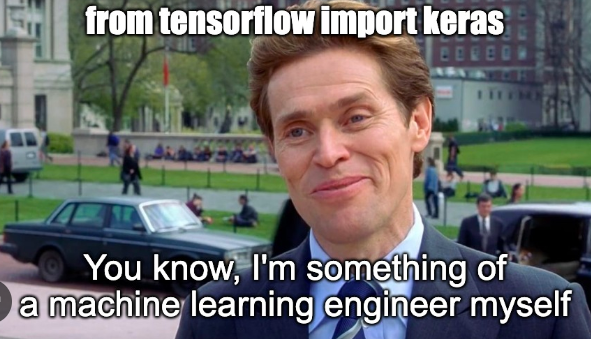

In [ ]:
num_of_classes=2 # with mask and without mask

model=keras.Sequential() # where we stack all our layers

model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3))) # It applies 32 convolution filters, each of size 3x3.
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu')) # same as above but with 64 filters
model.add(keras.layers.MaxPooling2D(pool_size=(2,2))) # Reduces spatial dimensions (width & height) by taking the maximum value in each 2×2 block.

model.add(keras.layers.Flatten()) # while passing your data or image to your model, as the numpy array is shown as an array. It converts smthng to a type of vector.

model.add(keras.layers.Dense(128, activation='relu')) # The numbers are mostly in the powers of 2
model.add(keras.layers.Dropout(0.5)) # Dropout randomly deactivates 50% of the neurons during training, Prevents overfitting by making the network less dependent on specific neurons.

model.add(keras.layers.Dense(64, activation='relu')) # same as above
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(num_of_classes, activation='sigmoid')) # output layer, sigmoid gives a probability between 0 and 1.
#(sigmoid because it is used in binary classification, there is also smthng called as softmax it is used when the prblm is of multi class classification(more than 2, ours is binary))
#(why? num_of_classes(because it depicts how many neurons, in our case it will be 2 which tells that 1 neuron will give prob. of with mask and other of without mask))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# compile the neural network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])
# Optimizer- It determines how the network will be updated based on the loss function.
# Loss- It is also known as loss function it basically compute errors between the predicted output and actual output.
# The sparse categorical cross-entropy loss function works by first converting the true labels into one-hot encoded vectors internally and then applying the regular categorical cross-entropy loss calculation.
# metrics- A metric is a function that is used to judge the performance of your model.

In [ ]:
# training our neural network
history=model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=5)
#validation split- How your model is performing on unknown data on each epoch(in overfitting the training accuracy will be high but your validation accuracy will be low)

Epoch 1/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 15s 48ms/step - acc: 0.7099 - loss: 0.5805 - val_acc: 0.9207 - val_loss: 0.2018
Epoch 2/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - acc: 0.8977 - loss: 0.2692 - val_acc: 0.9190 - val_loss: 0.1641
Epoch 3/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - acc: 0.9181 - loss: 0.2214 - val_acc: 0.9405 - val_loss: 0.1859
Epoch 4/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 5s 18ms/step - acc: 0.9324 - loss: 0.1727 - val_acc: 0.9471 - val_loss: 0.1383
Epoch 5/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - acc: 0.9431 - loss: 0.1438 - val_acc: 0.9438 - val_loss: 0.1472


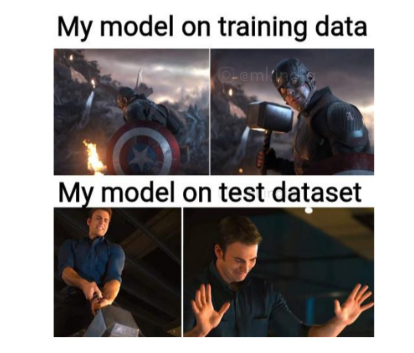

**Model Evaluation**

In [ ]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy=', accuracy)
#It runs the model on test data and it returns accuracy and loss

NameError: name 'model' is not defined

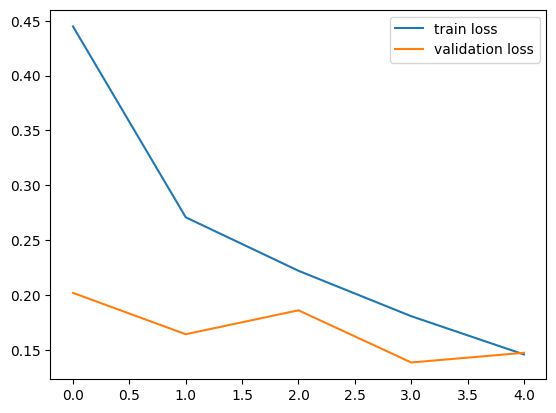

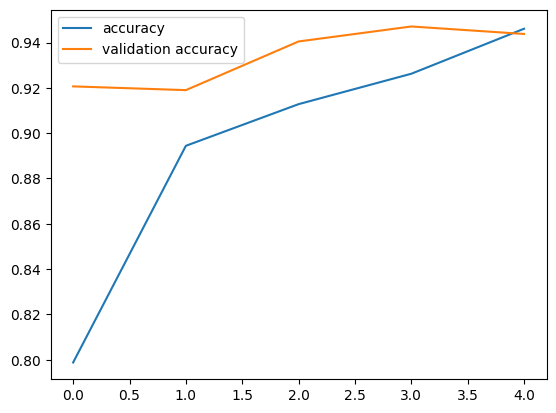

In [ ]:
h=history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['acc'], label='accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()

**Predictive System**

In [ ]:
#input image will need to be added
input_image_path=input('Path of the image to be predicted')
input_image=cv2.imread(input_image_path) # to read the image given by the user and convert it to a numpy array

cv2_imshow(input_image)

input_image_resize= cv2.resize(input_image, (128,128)) # to resize the image

input_image_scaled= input_image_resize/255 # to make it the value between 0 or 1

input_reshape= input_image_scaled.reshape(1,128,128,3) # this line tells the program that we are making prediction for 1 data point

input_prediction=model.predict(input_reshape) # it is used to make a prediction using the reshaped data

print(input_prediction) # The output will be a probability not a 0 or 1 like machine learning

input_pred_label= np.argmax(input_prediction) # If the first value is maximum it will return 0 else it will return 1. This step is done to convert probability values to specific labels

print(input_pred_label)

if input_pred_label == 1:
  print('The person in the image is wearing a mask')
else:
  print('The person in the image is not wearing a mask')

KeyboardInterrupt: Interrupted by user

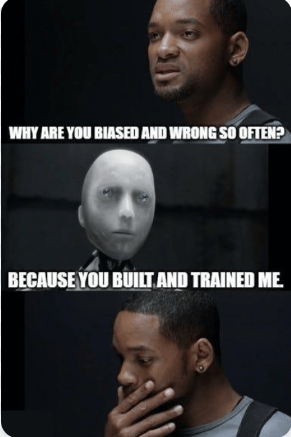